In [9]:
import numpy as np
import matplotlib.pyplot as plt
from markov import *

# 1. Existing transition matrix

## 1.1 Creating the transition matrix from a count matrix

In [2]:
C = np.array([[3, 1, 5, 8, 1], 
              [0, 5, 3, 9, 4], 
              [9, 6, 6, 5, 9], 
              [0, 1, 3, 5, 1], 
              [9, 6, 0, 5, 1]])
T = C / C.sum(axis=1)[:, None]
states = [chr(i) for i in range(65, 65+5)]
print(states)

print(f"Transition matrix row check: {T.sum(axis=1)}")

['A', 'B', 'C', 'D', 'E']
Transition matrix row check: [1. 1. 1. 1. 1.]


## 1.2 Creating and analyzing the MarkovModel

In [3]:
model = MarkovModel(tmatrix=T, cmatrix=C, states=states, lag_step=1)

In [4]:
p_inf = model.stationary_distribution()
print(f"Steady-state probabilities: {p_inf}")
print(f"Most common state: {states[p_inf.argmax()]}")

Steady-state probabilities: [0.13228602 0.15505826 0.20612804 0.3729817  0.13354599]
Most common state: D


In [5]:
timescales = model.timescales(4, 1)
print(f"Timescales: {timescales} units")

Timescales: [0.62661545 0.69129479 0.69129479 0.3224483 ] units


# 2. From existing trajectories

## 2.1 Creating discrete trajectories and states lists

In [6]:
trajectories = [[0,1,1,1,2,2,1,1,1,1,1,2,2,2,3,3,3,4,4,4,0,0,1,1,3,1,2,3,1,3,0,1,1,1,2,2,2,3,0,0,1],
                [0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,3,1,2,3,4,1,1,2,3,1,1,3,4,1,2,3,4,2,1],
                [0,0,0,1,1,2,3,2,2,2,2,3,4,3,2,1,2,3,4,2,1,0,0,0,1,0,0,1,2,3,1,2,0,0,0,0,0,1,1,1,2,2,2,2,1,0,1]]
states = [chr(i) for i in range(65, 65+5)]

## 2.2 Creating the model

In [7]:
model, trajectories_out = create_from_trajectories(trajectories, states, 1)

(0.0, 1.0)

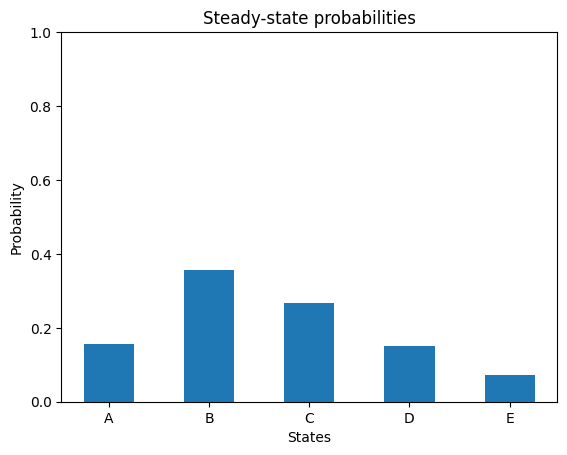

In [16]:
# Plotting steady state probabilities with lag_step=1
p_inf = model.stationary_distribution()
fig, ax = plt.subplots()
ax.bar(states, p_inf, width=0.5)
ax.set_title("Steady-state probabilities")
ax.set_xlabel("States")
ax.set_ylabel("Probability")
ax.set_ylim((0, 1))

In [29]:
# Getting timescales with different lag_step values
lag_steps = [1,2,4,6,8,10,12,14,16,18,20]
timescales = []
for lag in lag_steps:
    model, _ = create_from_trajectories(trajectories, states, lag)
    timescales.append( model.timescales(4, 1) )
timescales = np.array(timescales)

(11, 4)

Text(0, 0.5, 'Timescales [time units]')

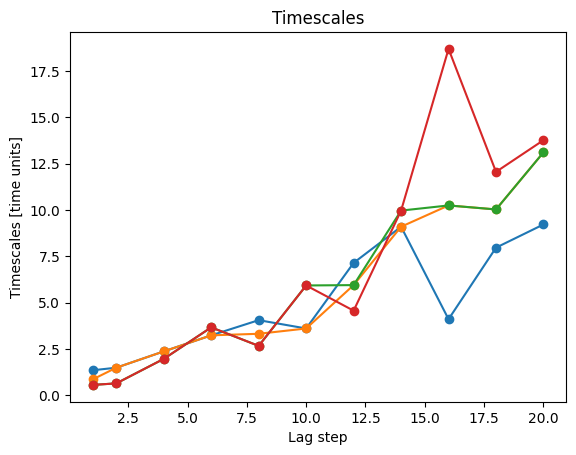

In [32]:
fig, ax = plt.subplots()
ax.plot(lag_steps, timescales, '-o')
ax.set_title("Timescales")
ax.set_xlabel("Lag step")
ax.set_ylabel("Timescales [time units]")